In [8]:
import sampler as sm
import survey
from importlib import reload 
import mass_function as mf
import mass_profile as mp
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import scipy
import pandas as pd
import pickle
import survey
import plotting as plot
import accel_data as ad
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CDM 

In [4]:
with open('../results/loglike_Roman_nfw_CDM_4_3_2.pkl', 'rb') as f:
    data_log = pickle.load(f)

In [7]:
with open('../results/pruned_samples_Roman_nfw_CDM_4_3_2.pkl', 'rb') as f:
    data_pruned = pickle.load(f)

In [17]:
with open('../results/samples_Roman_nfw_CDM_4_3_2.pkl', 'rb') as f:
    data = pickle.load(f)

In [6]:
data_log.shape

(144000,)

In [18]:
data.shape

(288000, 4)

In [8]:
data_pruned.shape

(117000, 4)

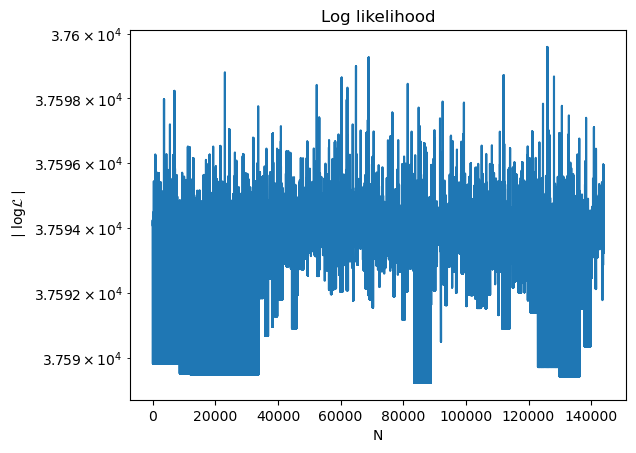

In [12]:
plt.plot(np.abs(data_log[:]))
plt.yscale('log')
plt.title('Log likelihood')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

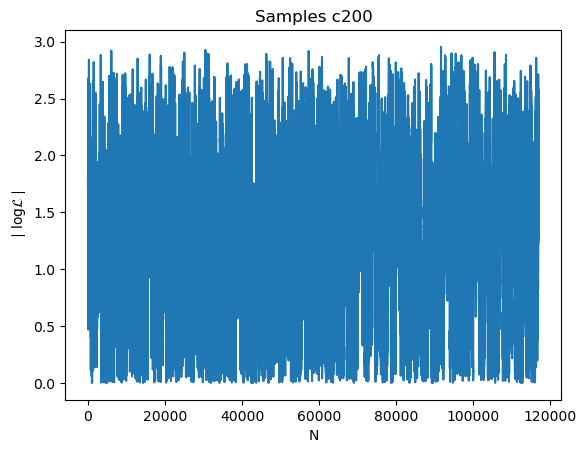

In [13]:
plt.plot(np.abs(data_pruned[:,0]))
#plt.yscale('log')
plt.title('Samples c200')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

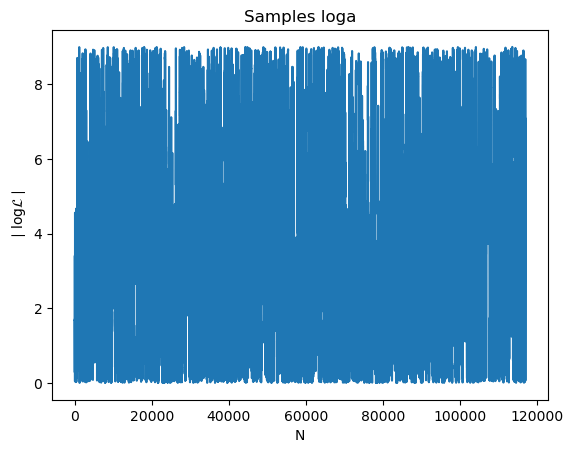

In [14]:
plt.plot(np.abs(data_pruned[:,1]))
#plt.yscale('log')
plt.title('Samples loga')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

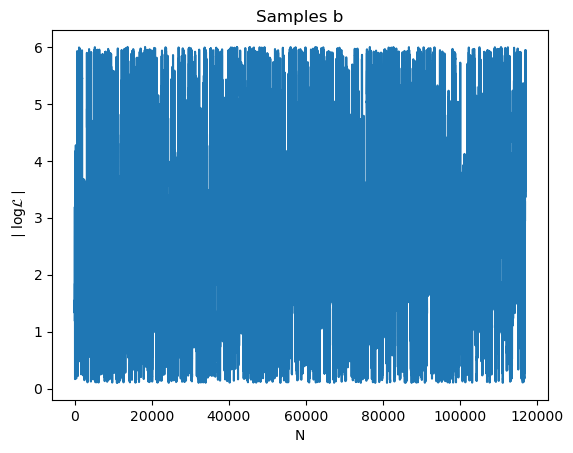

In [15]:
plt.plot(np.abs(data_pruned[:,2]))
#plt.yscale('log')
plt.title('Samples b')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

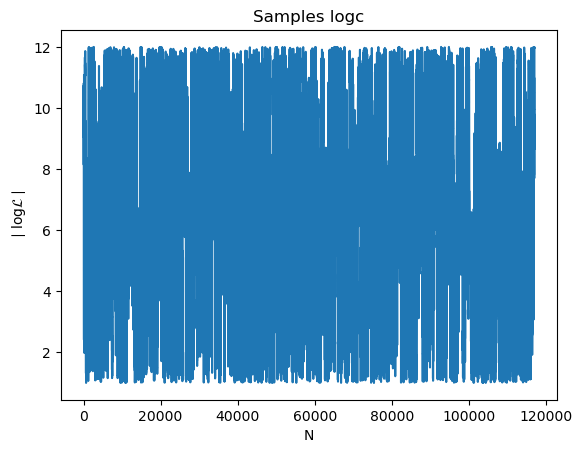

In [16]:
plt.plot(np.abs(data_pruned[:,3]))
#plt.yscale('log')
plt.title('Samples logc')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

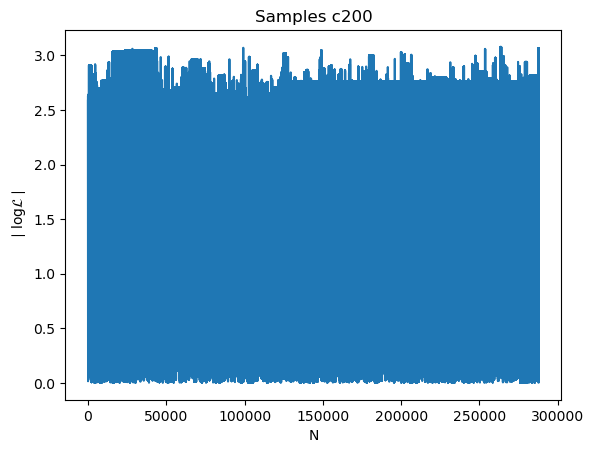

In [22]:
plt.plot(np.abs(data[100:,0]))
#plt.yscale('log')
plt.title('Samples c200')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

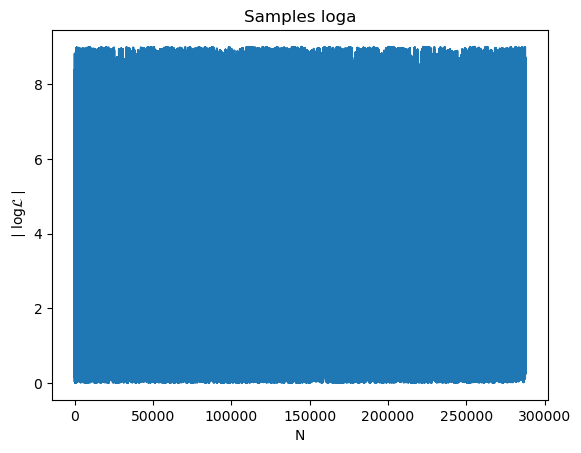

In [23]:
plt.plot(np.abs(data[100:,1]))
#plt.yscale('log')
plt.title('Samples loga')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

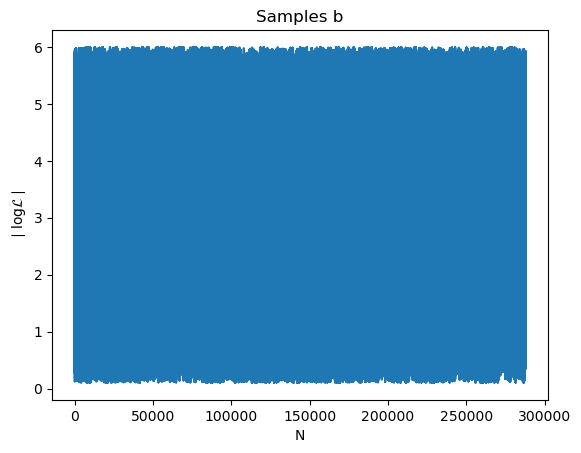

In [24]:
plt.plot(np.abs(data[100:,2]))
#plt.yscale('log')
plt.title('Samples b')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

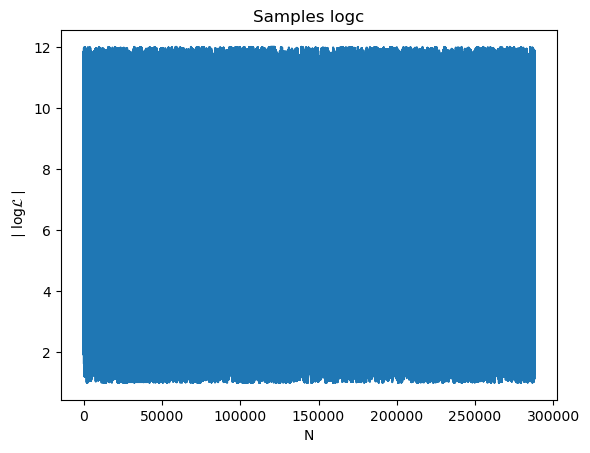

In [25]:
plt.plot(np.abs(data[100:,3]))
#plt.yscale('log')
plt.title('Samples logc')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

## Log Likelihood

In [ ]:
## Computing chisq at high c200 vals, fiducial loga=-4.49, b=-1.9, logc= 7.41
c200 = np.logspace(0,8,100)
chisq = []
for i in range(len(c200)):
    chisq.append(cdm_64.lnlike([np.log10(c200[i]),-3.1,-3.95,6.02]))
plt.plot(np.log10(c200),chisq)
#plt.xlim([0,4])
#plt.yscale('symlog')
plt.xlabel(r'logc200')
plt.ylabel(r'logL')

## PBH

In [174]:
pbh = mf.PBH(m_l=[1.0])#m_l=np.logspace(-2,4,5))

0.0 -1.0
0.039894228040143274 solMass [0.36792016]
[1]


[autoreload of mass_function failed: Traceback (most recent call last):
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 484, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 381, in update_generic
    update(a, b)
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 333, in update_class
    if update_generic(old_obj, new_obj):
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 381, in update_generic
    update(a, b)
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/IPython/extensions/a

In [7]:
ps = mp.PointSource(Ml=1)

In [9]:
r = survey.Roman()

In [11]:
a = ad.AccelData(r,nstars=1000,ndims=2)

Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0_2024:04:16-12.17.02.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0_2024:04:16-12.17.02.png
(1000, 2)
2024-04-16T12:17:02.563811: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0_2024:04:16-12.17.02.png


In [97]:
chisq= []
chisq.append(a.lnlike([1.0],r,1000,ps,pbh))
chisq.append(a.lnlike([1e-2],r,1000,ps,pbh))
chisq.append(a.lnlike([1e-4],r,1000,ps,pbh))
chisq.append(a.lnlike([1e-6],r,1000,ps,pbh))
chisq.append(a.lnlike([1e-8],r,1000,ps,pbh))

In lensing model
Time taken for alphal_vec: 480.285464 second
Time taken for alphal (not alpha_vec): 0.000503 second
Time taken for lensing model: 480.286506 second
Trying
In lensing model
Time taken for alphal_vec: 483.201304 second
Time taken for alphal (not alpha_vec): 0.000917 second
Time taken for lensing model: 483.202814 second
Trying
In lensing model
Time taken for alphal_vec: 476.818989 second
Time taken for alphal (not alpha_vec): 0.000487 second
Time taken for lensing model: 476.819759 second
Trying
In lensing model
Time taken for alphal_vec: 480.307337 second
Time taken for alphal (not alpha_vec): 0.000488 second
Time taken for lensing model: 480.308260 second
Trying
In lensing model
Time taken for alphal_vec: 479.406685 second
Time taken for alphal (not alpha_vec): 0.000478 second
Time taken for lensing model: 479.407471 second
Trying


In [101]:
np.shape(chisq), chisq

((5, 2),
 [a_x   -1.155026e+18
  a_y   -1.559508e+18
  dtype: float64,
  a_x   -3.392301e+20
  a_y   -5.755518e+19
  dtype: float64,
  a_x   -1.423712e+21
  a_y   -4.481862e+21
  dtype: float64,
  a_x   -2.039340e+20
  a_y   -5.462286e+19
  dtype: float64,
  a_x   -3.639805e+23
  a_y   -3.502556e+24
  dtype: float64])

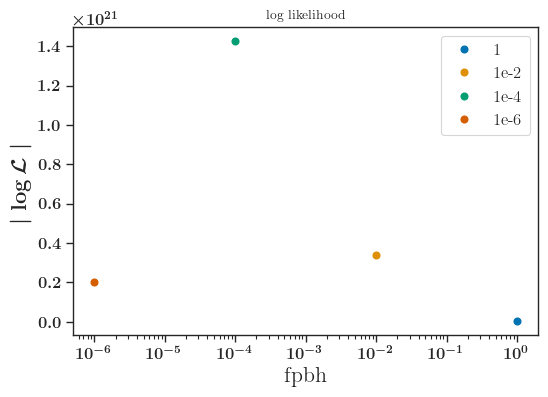

In [102]:
plt.plot([1.0],np.abs(chisq[0].a_x),'o',label='1')
plt.plot([1e-2],np.abs(chisq[1].a_x),'o',label='1e-2')
plt.plot([1e-4],np.abs(chisq[2].a_x),'o',label='1e-4')
plt.plot([1e-6],np.abs(chisq[3].a_x),'o',label='1e-6')
#plt.plot([1e-8],np.abs(chisq[4].a_x),'o',label='1e-8')
plt.xscale('log')
plt.title('log likelihood')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$')
plt.xlabel('fpbh')
plt.legend()

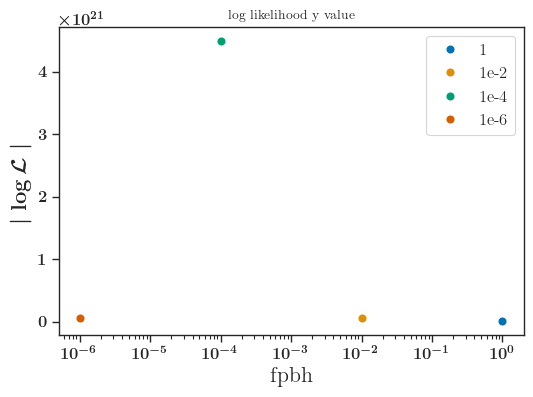

In [103]:
plt.plot([1.0],np.abs(chisq[0].a_y),'o',label='1')
plt.plot([1e-2],np.abs(chisq[1].a_y),'o',label='1e-2')
plt.plot([1e-4],np.abs(chisq[2].a_y),'o',label='1e-4')
plt.plot([1e-6],np.abs(chisq[3].a_y),'o',label='1e-6')
#plt.plot([1e-8],np.abs(chisq[4].a_y),'o',label='1e-8')
plt.xscale('log')
plt.title('log likelihood y value')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$')
plt.xlabel('fpbh')
plt.legend()

In [ ]:
import lensing model as lm

## WDM

In [18]:
wdm = mf.WDM_stream(m_l=np.logspace(6,9,10))

In [19]:
nfw = mp.NFW(Ml=1.e5*u.Msun, c200= 13)

In [21]:
b = ad.AccelData(r,nstars=1000,ndims=2, wdm=True)

In lensing model
Time taken for alphal_vec: 0.042924 second
Time taken for alphal (not alpha_vec): 0.000393 second
Time taken for lensing model: 0.043480 second
<class 'astropy.units.quantity.Quantity'> [[ 3.92194546e-07 -1.77428079e-06]
 [ 2.08040793e-08  9.97305154e-08]
 [-2.58678866e-09 -5.81413358e-09]
 ...
 [-9.59417961e-10 -4.62904117e-10]
 [ 9.28002934e-10  1.86925472e-08]
 [ 4.42780325e-09 -2.98336325e-08]] uas / yr2
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0_2024:04:16-12.38.09.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0_2024:04:16-12.38.09.png
(1000, 2)
2024-04-16T12:38:09.085815: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0_2024:04:16-12.38.09.png


In [161]:
chisq_wdm_best = []
chisq_wdm_fid = []
mwdm = np.logspace(-1,4,100)
for i in range(len(mwdm)):
    chisq_wdm_fid.append(b.lnlike([np.log10(13),mwdm[i],2.7,0.99],r,1000,nfw,wdm))
    chisq_wdm_best.append(b.lnlike([np.log10(13),mwdm[i],12.58,3.47],r,1000,nfw,wdm))

In [162]:
np.shape(chisq_wdm_fid)

(100, 2)

In [69]:
print("{:.8f}".format(chisq_wdm[0].a_y))
print("{:.8f}".format(chisq_wdm[1].a_y))

-1383.70128125
-1383.70128128


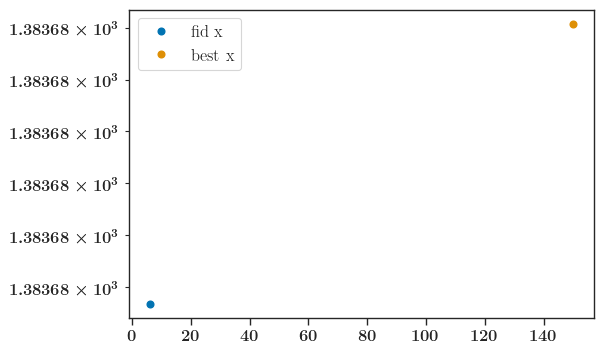

In [60]:
plt.plot([6.3],np.abs(chisq_wdm[0].a_x),'o',label='fid x')
#plt.plot([6.3],chisq_wdm[0].a_y,'o',label='fid y')
plt.plot([150],np.abs(chisq_wdm[1].a_x),'o',label='best x')
#plt.plot([150],chisq_wdm[1].a_y,'o',label='best y')
plt.yscale('log')
plt.legend()

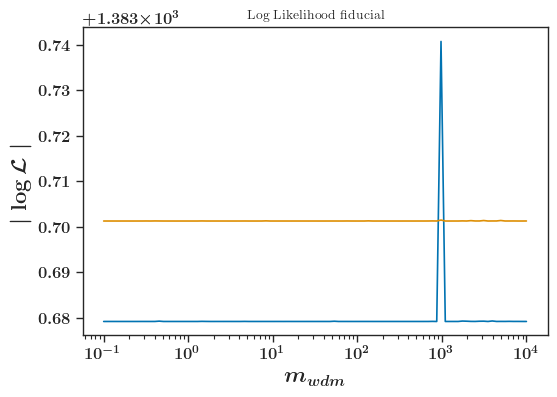

In [163]:
plt.plot(mwdm,np.abs(chisq_wdm_fid))
#plt.ylim(top=1.38368*10**3)
plt.title('Log Likelihood fiducial')
plt.xlabel(r'$m_{wdm}$')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$')
plt.xscale('log')
#plt.legend()

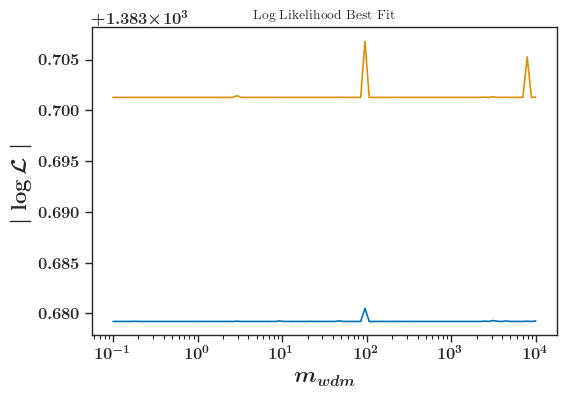

In [164]:
plt.plot(mwdm,np.abs(chisq_wdm_best))
#plt.ylim(top=1.38368*10**3)
plt.title('Log Likelihood Best Fit')
plt.xlabel(r'$m_{wdm}$')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$')
plt.xscale('log')
#plt.legend()